## Cvičení

Rozhodnutí o zrušení rezervace může záviset na tom, jak dlouho uživatelé plánují v hotelu zůstat. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data/hotel_bookings.csv")


1. Začni s počtem ve všední den (`stays_in_week_nights`). V datech jsou některé pobyty s extrémně dlouhou dobou. Napiš dotaz, který vytvoří tabulku, kde jsou pobyty kratší než 10 všedních dní. Poté vytvoř graf, který zobrazuje počty zrušených a nezrušených rezervací dle počtu všechních dní, na které je rezervace plánována.


In [2]:
data_stays_week = data[data["stays_in_week_nights"] < 10]

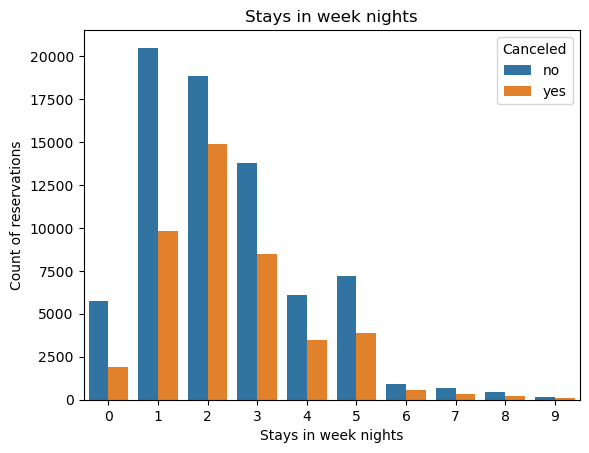

In [3]:
ax = sns.countplot(data=data_stays_week,
                   x="stays_in_week_nights", hue="is_canceled")
ax.set(xlabel="Stays in week nights",
       ylabel="Count of reservations", title="Stays in week nights")
ax.legend(labels=["no", "yes"], title="Canceled")

2. Nyní budeme uvažovat celkovou délku pohybu. Vytvoř sloupec `total_length`, který bude dán součtem sloupců `stays_in_weekend_nights` a `stays_in_week_nights`. Pomocí dotazu dále vytvoř tabulku, která bude obsahovat pouze řádky s hodnotou ve sloupci `total_length` větší než 0 (rezervace s nulovou délkou jsou totiž podivnosti, které z naší analýzy vyřadíme) a současně menší než 10.


In [4]:
data["total_length"] = data["stays_in_weekend_nights"] + \
    data["stays_in_week_nights"]
data_total_length = data[(data["total_length"] < 10)
                         & (data["total_length"] > 0)]

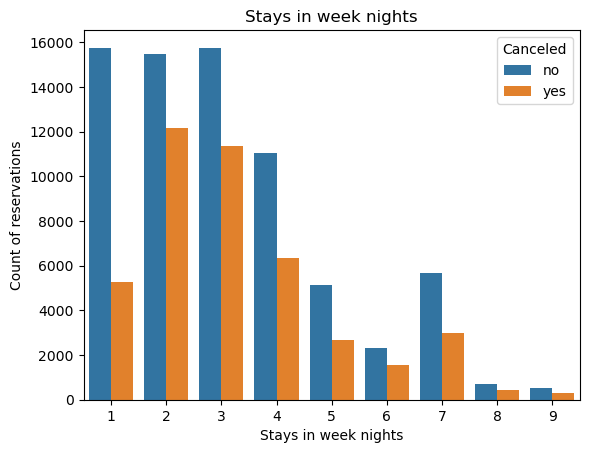

In [5]:
ax = sns.countplot(data=data_total_length, x="total_length", hue="is_canceled")
ax.set(xlabel="Stays in week nights",
       ylabel="Count of reservations", title="Stays in week nights")
ax.legend(labels=["no", "yes"], title="Canceled")

3. Do zrušení rezervace může zasahovat i cena. Protože cena služeb obecně silně závisí na zemi, ve které hotel je, vybereme jen jednu zemi. Podívej se na sloupec `country` a vyber druhou nejčastěji se vyskytující zemi. Cena za pokoj je ve sloupci `adr`. Opět je potřeba zbavit se extrémních pozorování, uvažuj pouze řádky s hodnotou `adr` do 300. Poté vytvoř graf, který zobrazuje počty zrušených a nezrušených rezervací v závislosti na její ceně.


In [6]:
data["country"].value_counts().head(2)

country
PRT    48590
GBR    12129
Name: count, dtype: int64

<Axes: xlabel='adr', ylabel='Count'>

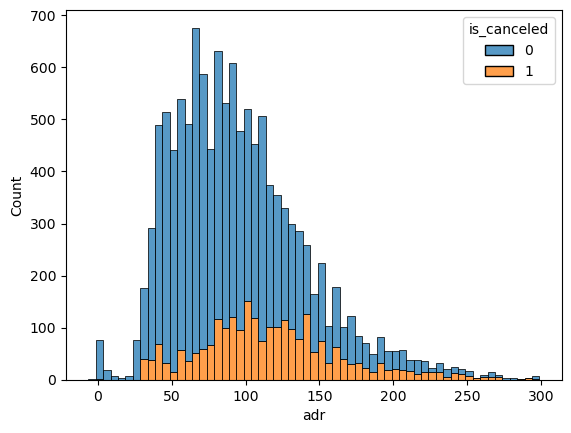

In [7]:
data_adr = data[(data["adr"] < 300) & (data["country"] == "GBR")]
sns.histplot(data=data_adr, x="adr", hue="is_canceled", multiple="stack")


## Bonus

Stáhni si data [inventory.csv](data/inventory.csv), která obsahují informace o prodejích a skladových zásobách různých produktů v jednom e-shopu.


### Nápověda:

* U bodu 2 můžeš pomocí dotazu nejprve vytvořit tabulku, která obsahuje pouze řádky, kdy je daný produkt vyprodán. Poté můžeš použít graf `countplot()`.

In [8]:
data = pd.read_csv("data/inventory.csv")
data.head()

,date,month,product_code,quantity,sold
0,2022-01-03,1,DBR-56,230,15
1,2022-01-03,1,A35-AC,68,2
2,2022-01-03,1,DTC-23,201,8
3,2022-01-04,1,DBR-56,211,19
4,2022-01-04,1,A35-AC,62,6



1. Produkty jsou skryty v kódech, které jsou ve sloupci `product_code`. Kolik jich je? Vypiš všechy unikátní hodnoty v tomto sloupci.


In [9]:
data["product_code"].unique()

array(['DBR-56', 'A35-AC', 'DTC-23'], dtype=object)

2. E-shop má problémy se zásobováním a produkty jsou občas vyprodané. Vytvoř graf, který pro jednotlivé kódy produktů zobrazí počty dnů, kdy je produkt vyprodán. Množství produktů je ve sloupci `quantity` (a pokud je produkt vyprodán, je ve sloupci `quantity` hodnota 0).


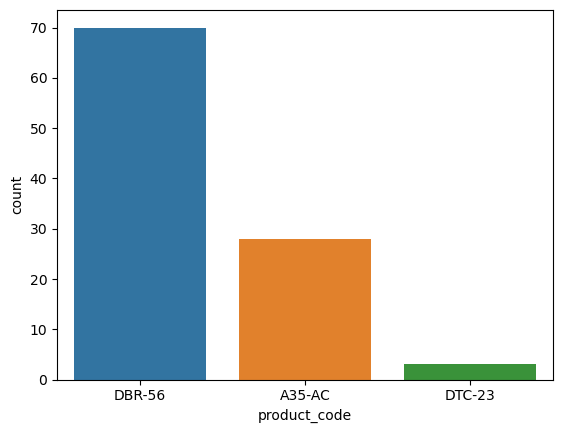

In [10]:
data_no_supply = data[data["quantity"] == 0]
ax = sns.countplot(data=data_no_supply, x="product_code")

1. Vytvoř graf průměrných prodejů v jednotlivých měsících. Měsíc najdeš ve sloupci `month`. Pro vytvoření grafu můžeš použít `barplot()`, který funguje podobně jako `countplot()`. Parametry `data`, `x` a `hue` nastav podle stejné logiky, jako bys tvořila `countplot()`. Dále použij parametr `y`, nastav mu hodnotu `sold`. 


<Axes: xlabel='month', ylabel='sold'>

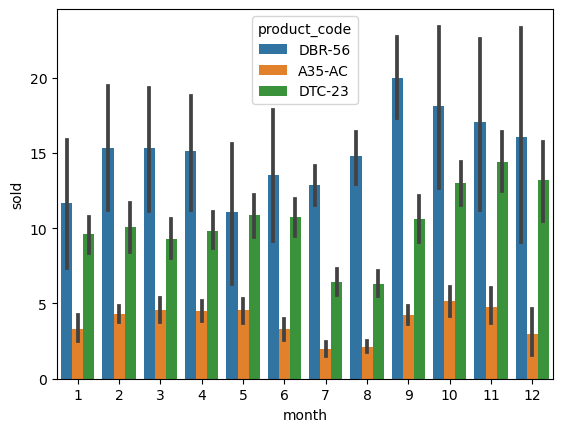

In [11]:
sns.barplot(data=data, x="month", y="sold", hue="product_code")